In [1]:
import pandas as pd
import csv
import numpy as np
from random import shuffle
import funcs as fc
import decimal
from copy import deepcopy
import math
import seaborn as sns


In [70]:
norPaths = ['recover_origin_wc', 'recover_bert_wc_cosine','recover_bert_wc_euclidean', 'recover_bert_wc_cityblock']


In [58]:
origin_dataSet = fc.readCSV('./data/finalPatientDataSet_20.csv', sep='\t')


In [79]:
origin_dataSet = fc.readCSV('./data/finalPatientDataSet_20.csv', sep='\t')
freaDcit  = dict()
for data in [data[5] for data in origin_dataSet if data[6] == '1']:
    if data not in freaDcit:
        freaDcit[data] = 0
        
    freaDcit[data] += 1
sorted(freaDcit.items(), key=lambda x:x[1], reverse =True)


[('Chronic congestive heart failure (disorder)', 4729),
 ('Myocardial Infarction', 3620),
 ('Viral sinusitis (disorder)', 3223),
 ('Stroke', 1900),
 ('Acute viral pharyngitis (disorder)', 1746),
 ('Pneumonia', 1658),
 ('Acute bronchitis (disorder)', 1498),
 ('Seizure disorder', 958),
 ('Bullet wound', 896),
 ('Cardiac Arrest', 891),
 ('Non-small cell carcinoma of lung  TNM stage 1 (disorder)', 471),
 ('Concussion injury of brain', 411),
 ('Neoplasm of prostate', 386),
 ('Streptococcal sore throat (disorder)', 346),
 ('Otitis media', 289),
 ('Drug overdose', 285),
 ('Sprain of ankle', 266),
 ('Polyp of colon', 261),
 ("Alzheimer's disease (disorder)", 223),
 ('Fracture of forearm', 222),
 ('Fracture of the vertebral column with spinal cord injury', 205),
 ('Hyperlipidemia', 203),
 ('Osteoporosis (disorder)', 198),
 ('Malignant tumor of colon', 197),
 ('Normal pregnancy', 186),
 ('Anemia (disorder)', 182),
 ('Concussion with no loss of consciousness', 176),
 ('Overlapping malignant neopl

In [8]:
k_var = 'k3'


In [77]:
# for k_var in ['k2', 'k3', 'k4']:
#     freqDict = dict()
# for filePath in norPaths[0:2]:
#         nor_dataset = fc.readCSV('./normalized/'+k_var+'/'+filePath+'.csv', sep='\t')
#         colValues = [data[2] for data in nor_dataset]
nor_dataset = fc.readCSV('./data/finalPatientDataSet_20.csv', sep='\t')
colValues = [data[5] for data in nor_dataset]

conditionList = list()
for conditions in colValues:
    splitedConditions = conditions.split(',')
    if len(splitedConditions) > 1:
        for con in splitedConditions:
            conditionList.append(con.strip())
    else:
        conditionList.append(conditions)

for conName in conditionList:
    if conName not in freqDict:
        freqDict[conName] = 0

    freqDict[conName] += 1


resultList = sorted(list(freqDict.items()), key=lambda x:x[1], reverse=True)[0:10]
for tup in resultList:
    print(tup)

print("")






('Viral sinusitis (disorder)', 379396)
('Acute bronchitis (disorder)', 217411)
('Acute viral pharyngitis (disorder)', 202860)
('Normal pregnancy', 104217)
('Chronic sinusitis (disorder)', 65194)
('Otitis media', 57920)
('Streptococcal sore throat (disorder)', 54701)
('Acute bacterial sinusitis (disorder)', 54647)
('Chronic congestive heart failure (disorder)', 50956)
('Sprain of ankle', 44738)



In [ ]:
('Viral sinusitis (disorder)', 126481)
('Acute bronchitis (disorder)', 96506)
('Acute viral pharyngitis (disorder)', 59780)
('Chronic sinusitis (disorder)', 52274)
('Acute bacterial sinusitis (disorder)', 45367)
('Normal pregnancy', 32377)
('Chronic congestive heart failure (disorder)', 24936)
('Otitis media', 21970)
('Streptococcal sore throat (disorder)', 19556)
('Concussion with no loss of consciousness', 19316)


In [64]:
conIndexMasterDict = dict()
for i, conNm in enumerate(resultList):
    conIndexMasterDict[conNm[0]] = i


In [66]:
indexedData =list()
for con in resultList:
    if con[0] == 'CONDITIOIN': continue
    indexedData.append([conIndexMasterDict[con[0]], con[1]])
    



In [67]:
chart_pd = pd.DataFrame(indexedData, columns=['condition', 'count'])

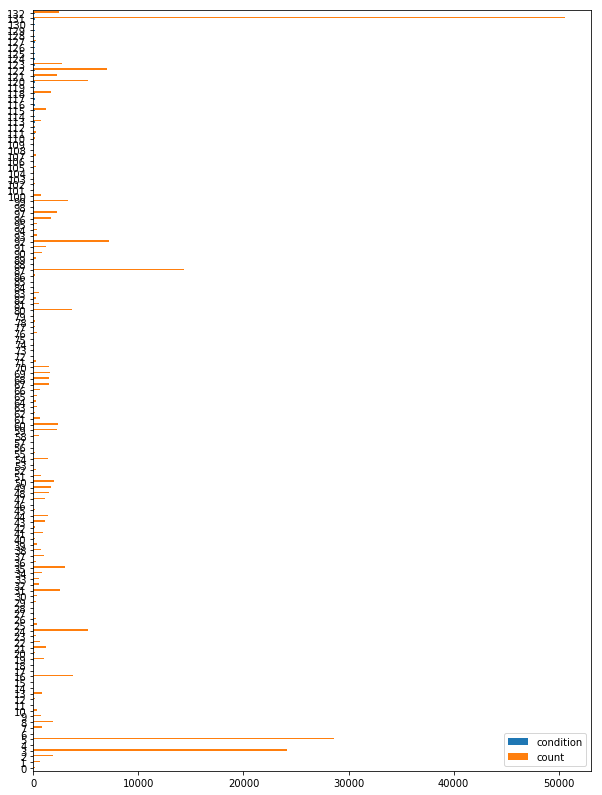

In [68]:
chart_pd.plot(kind='barh',figsize=(10,14))


/Users/asha172/anaconda3/envs/tensorflow/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


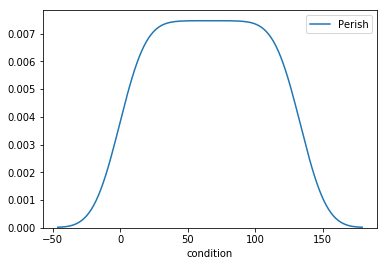

In [45]:
sns.distplot(chart_pd['condition'], hist=False, label="Perish")
# sns.distplot(survived['Age'], hist=False, label="Survived")
